# Week 1: Introduction to Stochastic Processes

**Objective:** Understand the fundamental definition of a stochastic process and learn to classify processes based on their time and state domains.

## Step 1: Build Intuition

Let's start with a simple, real-world analogy. Think about the **price of a stock** over a year. 

- We can't predict its exact value on any future day; there's an element of randomness.
- However, the price evolves over time, and we can observe it at different points (e.g., daily at market close).

A **stochastic process** is simply a mathematical way to describe a system that evolves randomly over time. It's a collection of random variables, where each variable represents the state of the system at a specific point in time.

Other examples include:
- The number of customers arriving at a store each hour.
- The temperature in a room, measured continuously.
- The path of a pollen grain suspended in water (Brownian motion).

## Step 2: Understand the Core Idea

To properly describe a stochastic process, we need to define two key components:

1.  **The Index Set (Time):** This describes *when* we observe the process.
    - **Discrete-Time:** Time moves in distinct, separate steps. We observe the process at specific moments, like `t = 0, 1, 2, 3, ...`. Think of the daily closing price of a stock.
    - **Continuous-Time:** Time flows smoothly. We can observe the process at *any* instant within an interval, like `t` in `[0, ∞)`. Think of the real-time temperature of a room.

2.  **The State Space:** This describes *what values* the process can take at each point in time.
    - **Discrete State Space:** The possible values are finite or countably infinite. For example, the outcome of a dice roll can only be `{1, 2, 3, 4, 5, 6}`.
    - **Continuous State Space:** The possible values can be any number within a given range. For example, temperature can be `21.5°C`, `21.51°C`, and so on.

## Step 3: Learn the Definitions and Formulas

Now, let's connect our intuition to the formal mathematics.

**Definition: Stochastic Process**
A stochastic process is a family of random variables `{X(t), t ∈ T}` defined on a common probability space, where:
- `X(t)` is the random variable representing the state of the process at time `t`.
- `T` is the **index set** (the set of all time points).

--- 

### Classification of Stochastic Processes

We can classify any stochastic process into one of four categories based on its index set and state space.

|                    | **Discrete State Space**                                     | **Continuous State Space**                                     |
| ------------------ | ------------------------------------------------------------ | -------------------------------------------------------------- |
| **Discrete-Time**  | The number of people in a queue at the end of each minute.   | The daily closing price of a stock.                            |
| **Continuous-Time**| The number of cars that have passed a point on a highway.    | The temperature of a liquid as it cools.                       |

## Step 4: Apply and Practice

Let's use Python to simulate and visualize one discrete-time and one continuous-time process. This helps solidify the concepts.

First, let's import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a style for plots for better visualization
plt.style.use('seaborn-v0_8-whitegrid')

### Example 1: A Discrete-Time Stochastic Process

Let's simulate a simple **random walk**. This is a classic discrete-time process. Imagine a person starting at position 0. At each time step (e.g., every second), they take a step of `+1` or `-1` with equal probability.

- **Index Set (Time):** Discrete `{0, 1, 2, ..., 100}`
- **State Space:** Discrete `{..., -2, -1, 0, 1, 2, ...}`

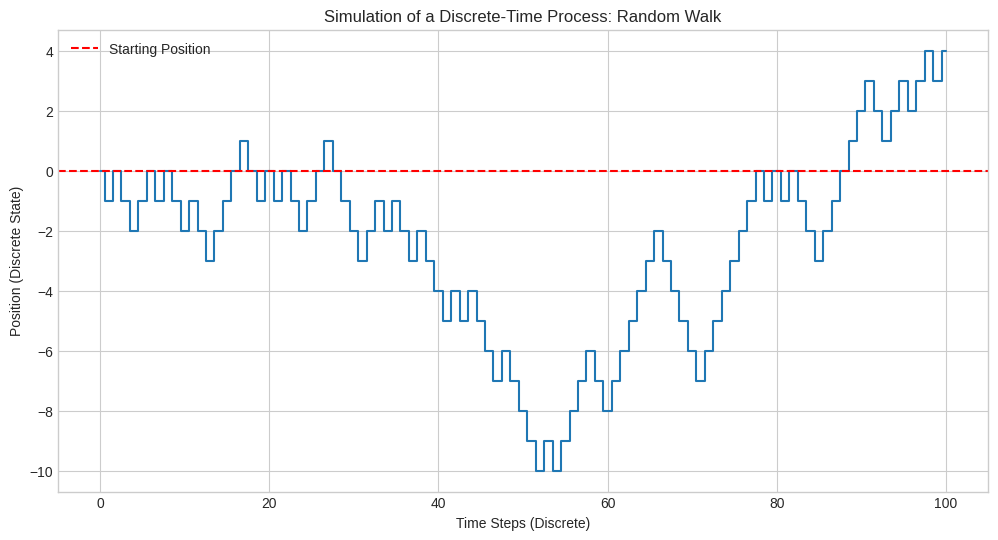

In [2]:
def simulate_random_walk(num_steps, start_pos=0):
    """Simulates a 1D random walk."""
    # Generate random steps: +1 or -1
    # np.random.choice is great for discrete state spaces
    steps = np.random.choice([-1, 1], size=num_steps)
    
    # Calculate the position at each time step by taking the cumulative sum
    # The first position is the starting position
    positions = np.concatenate(([start_pos], steps)).cumsum()
    return positions

# Simulation parameters
N_STEPS = 100

# Run the simulation
random_walk_path = simulate_random_walk(N_STEPS)
time_steps = np.arange(N_STEPS + 1)

# Plot the results
plt.figure(figsize=(12, 6))
# We use plt.step() to emphasize the discrete nature of time
plt.step(time_steps, random_walk_path, where='mid')
plt.title('Simulation of a Discrete-Time Process: Random Walk')
plt.xlabel('Time Steps (Discrete)')
plt.ylabel('Position (Discrete State)')
plt.axhline(0, color='red', linestyle='--', label='Starting Position')
plt.legend()
plt.show()

### Example 2: A Continuous-Time Stochastic Process

We can't truly model a continuous process on a computer, but we can approximate it by taking very frequent samples. Let's simulate the **temperature in a room** over 24 hours. We'll model it as a daily sinusoidal cycle (colder at night, warmer during the day) plus some random noise.

- **Index Set (Time):** Continuous `[0, 24]` hours
- **State Space:** Continuous (e.g., any temperature value in a range)

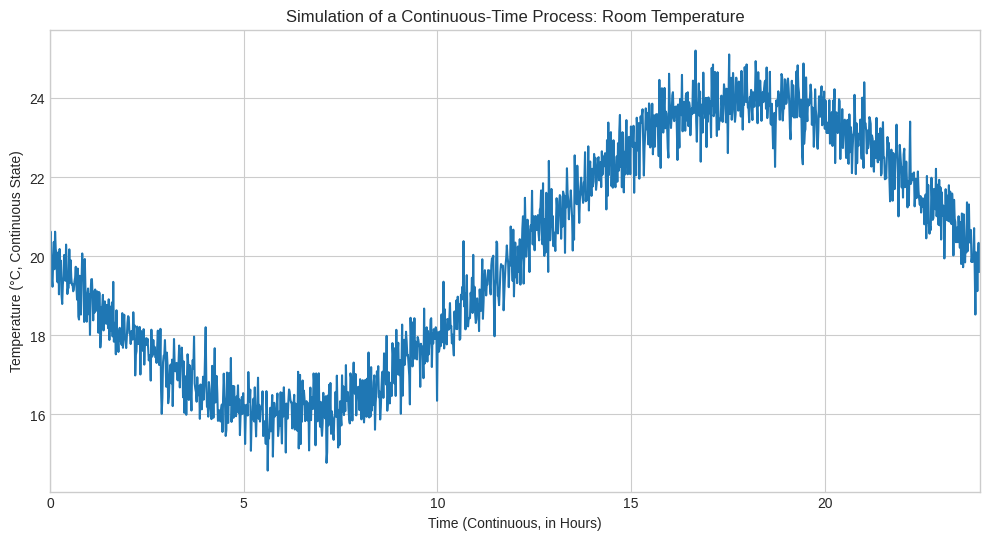

In [3]:
def simulate_temperature(total_hours, samples_per_hour):
    """Simulates room temperature over a period with a daily cycle and noise."""
    # Create a fine-grained time axis to approximate continuity
    num_samples = total_hours * samples_per_hour
    time = np.linspace(0, total_hours, num_samples)
    
    # Create a base temperature cycle (sine wave)
    # Lowest at t=6 (6 AM), highest at t=18 (6 PM)
    avg_temp = 20  # Average temperature in Celsius
    amplitude = 4    # Fluctuation
    base_temp = avg_temp - amplitude * np.cos(2 * np.pi * (time - 6) / 24)
    
    # Add some random noise to make it a stochastic process
    # np.random.randn is great for continuous state spaces
    noise = np.random.randn(num_samples) * 0.5  # Small random fluctuations
    
    temperature = base_temp + noise
    return time, temperature

# Simulation parameters
TOTAL_HOURS = 24
SAMPLES_PER_HOUR = 60 # Sample every minute

# Run the simulation
time_continuous, temp_continuous = simulate_temperature(TOTAL_HOURS, SAMPLES_PER_HOUR)

# Plot the results
plt.figure(figsize=(12, 6))
# We use plt.plot() to show the smooth, continuous nature of the process
plt.plot(time_continuous, temp_continuous)
plt.title('Simulation of a Continuous-Time Process: Room Temperature')
plt.xlabel('Time (Continuous, in Hours)')
plt.ylabel('Temperature (°C, Continuous State)')
plt.xlim(0, TOTAL_HOURS)
plt.show()

## Summary & Next Steps

In this notebook, we've learned that:
1.  A **stochastic process** models a system that evolves randomly over time.
2.  We can classify them based on whether **time** is discrete or continuous.
3.  We can also classify them based on whether the **state space** (possible values) is discrete or continuous.
4.  Visualizing simple simulations helps build a strong intuition for these concepts.

In **Week 2**, we will dive deeper into the first example we saw: the **Random Walk**, and explore one of its most famous applications, the **Gambler's Ruin Problem**.